In [1]:
%matplotlib inline 
%load_ext memory_profiler

import pandas as pd
import numpy as np
import os
import sys
import glob
import scanpy as sc

In [2]:
%%memit
adata_file = '/home/ngr4/project/scnd/data/processed/mouse_200614.h5ad'
adata = sc.read(adata_file)

peak memory: 10757.24 MiB, increment: 10578.29 MiB


In [3]:
%%memit

pdfp = '/home/ngr4/project/scnd/data/processed'
pfp = '/home/ngr4/project/scnd/results/'
sc.settings.figdir = pfp

wt = sc.read(os.path.join(pdfp,'mouse_wt_imputed.h5ad'))
mut = sc.read(os.path.join(pdfp,'mouse_sca1_imputed.h5ad'))

peak memory: 84949.80 MiB, increment: 74207.02 MiB


In [4]:
# select just ubc
wt = wt[(wt.obs['ctype']=='Unipolar brush cell'), :]
mut = mut[(mut.obs['ctype']=='Unipolar brush cell'), :]

ubc = wt.concatenate(mut, batch_key='imp', batch_categories=['WTimp', 'SCA1imp'])

del wt, mut

# re-run to avoid batch effects
sc.tl.pca(ubc)

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [5]:
adata = adata[(adata.obs['ctype']=='Unipolar brush cell'), :] 


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
sc.tl.pca(adata)

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]


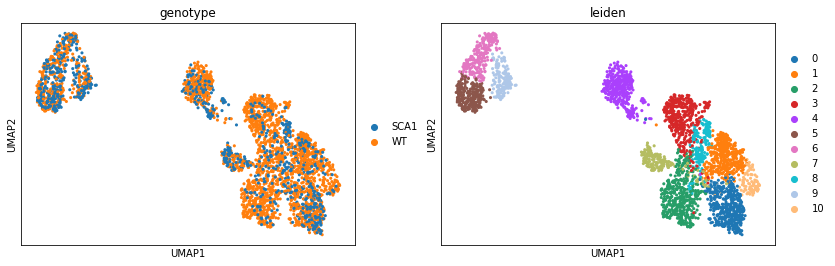

In [19]:
sc.external.pp.bbknn(adata, neighbors_within_batch=3, n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['genotype', 'leiden'])

In [20]:
print('OFF proportion: {:.2f}'.format(adata.obs.loc[adata.obs['leiden'].astype(str).isin([str(i) for i in [5, 6, 9]]), :].shape[0]/adata.shape[0]))

OFF proportion: 0.20


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]


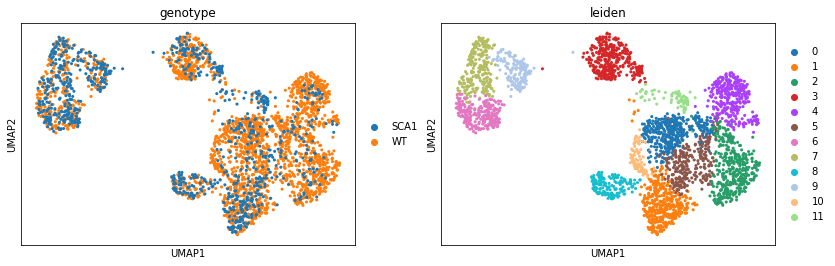

In [23]:
sc.external.pp.bbknn(ubc, neighbors_within_batch=3, n_pcs=20)
sc.tl.umap(ubc)
sc.tl.leiden(ubc)
sc.pl.umap(ubc, color=['genotype', 'leiden'])

In [24]:
print('OFF proportion: {:.2f}'.format(ubc.obs.loc[ubc.obs['leiden'].astype(str).isin([str(i) for i in [6,7,9]]), :].shape[0]/ubc.shape[0]))

OFF proportion: 0.20


In [28]:
# annotate the clusters
ubc.obs['ubc_subtype'] = 'None'
ubc.obs.loc[ubc.obs['leiden'].astype(str).isin([str(i) for i in [6,7,9]]), 'ubc_subtype'] = 'OFF'
ubc.obs.loc[~ubc.obs['leiden'].astype(str).isin([str(i) for i in [6,7,9]]), 'ubc_subtype'] = 'ON'

... storing 'ubc_subtype' as categorical


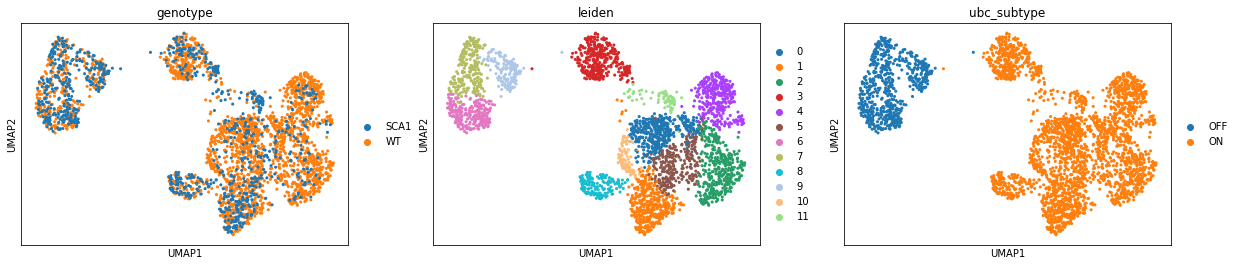

In [29]:
sc.pl.umap(ubc, color=['genotype', 'leiden', 'ubc_subtype'])

In [30]:
# save this ubc
ubc.write(os.path.join(pdfp, 'ubc.h5ad'))

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]
... storing 'batch' as categorical
... storing 'genotype' as categorical
... storing 'louvain' as categorical


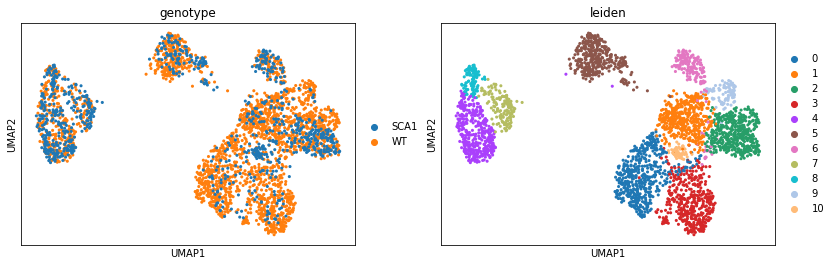

In [8]:
sc.external.pp.bbknn(ubc, neighbors_within_batch=5, n_pcs=50)
sc.tl.umap(ubc)
sc.tl.leiden(ubc)
sc.pl.umap(ubc, color=['genotype', 'leiden'])

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:294: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = bbknn_out[0]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/bbknn/__init__.py:295: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = bbknn_out[1]


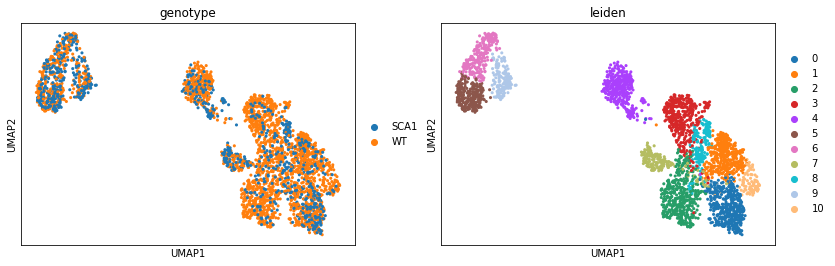

In [51]:
sc.external.pp.bbknn(adata, neighbors_within_batch=3,n_pcs=50)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['genotype', 'leiden'])

In [39]:
()/3154

0.18357641090678503

In [44]:
adata.obs.groupby('leiden').count()

,batch,genotype,timepoint,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pmito,n_genes,louvain,res_sca1,ees_sca1,stored_ctype,ctype,value,imp
leiden,,,,,,,,,,,,,,,,,,,,
0,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446
1,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442
2,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
3,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
4,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372
5,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370
6,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179
7,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153
8,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151


/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2400 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


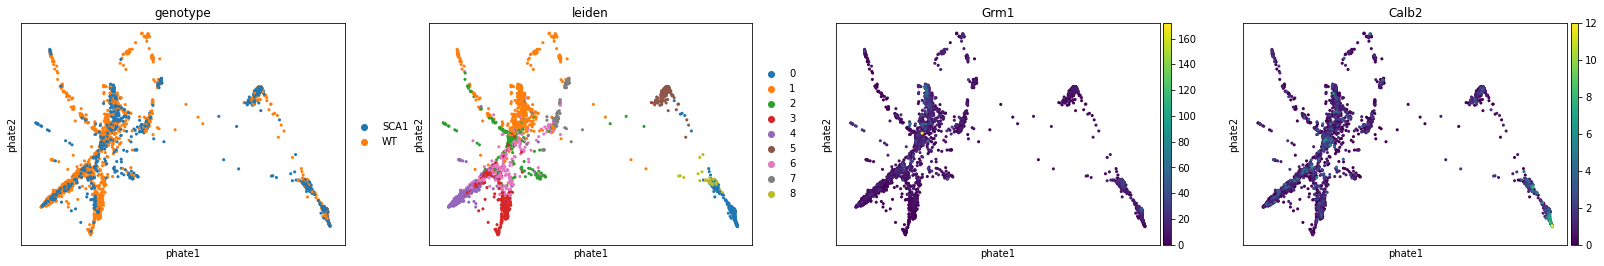

In [20]:
sc.external.tl.phate(ubc, gamma=0)
sc.external.pl.phate(ubc,  color=['genotype', 'leiden', 'Grm1', 'Calb2'])

In [26]:
ubc

AnnData object with n_obs × n_vars = 3154 × 26374
    obs: 'batch', 'genotype', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pmito', 'n_genes', 'louvain', 'res_sca1', 'ees_sca1', 'stored_ctype', 'ctype', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'louvain', 'neighbors', 'pca', 'umap', 'leiden', 'genotype_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_phate', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [25]:
ubc.obs.groupby(['genotype', 'timepoint']).count().reset_index()

,genotype,timepoint,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pmito,n_genes,louvain,res_sca1,ees_sca1,stored_ctype,ctype,leiden
0,SCA1,5wk,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
1,SCA1,12wk,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2,SCA1,18wk,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
3,SCA1,24wk,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248
4,SCA1,30wk,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
5,WT,5wk,971,971,971,971,971,971,971,971,971,971,971,971,971,971,971,971,971
6,WT,12wk,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
7,WT,18wk,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766
8,WT,24wk,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228
9,WT,30wk,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145


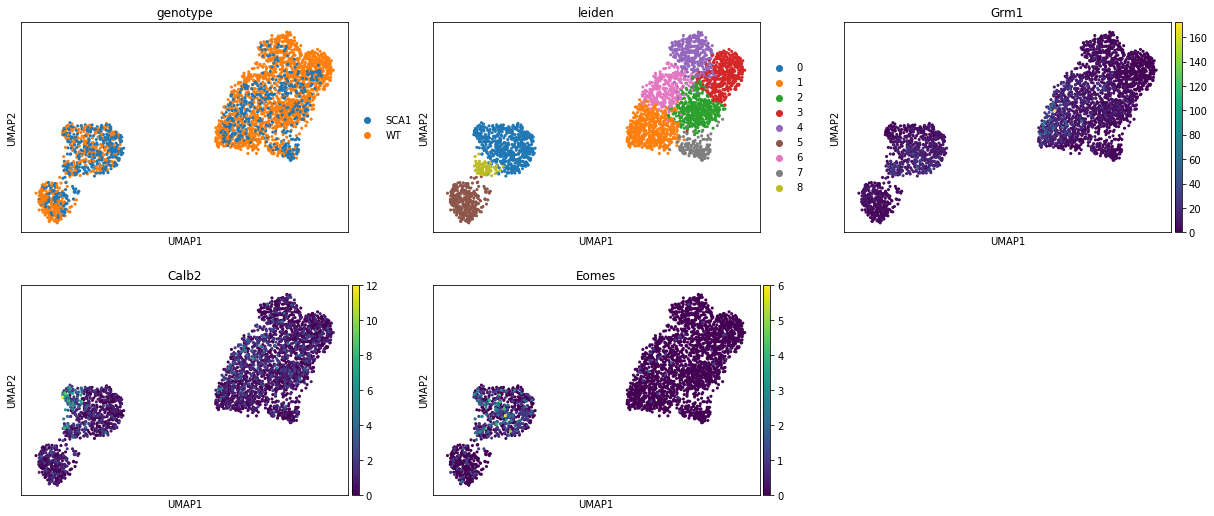

In [27]:
sc.pl.umap(ubc, color=['genotype', 'leiden', 'Grm1', 'Calb2', 'Eomes'], ncols=3)

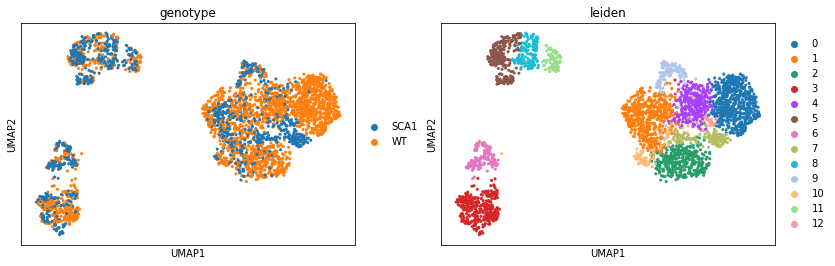

In [8]:
# no batch correction
sc.pp.neighbors(ubc, n_neighbors=30, n_pcs=50)
sc.tl.umap(ubc)
sc.tl.leiden(ubc)
sc.pl.umap(ubc, color=['genotype', 'leiden'])